# Salary Fun

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salaries/salary.csv


## Read in my Data File

In [2]:
salary = pd.read_csv('/kaggle/input/salaries/salary.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


## Select our Data for our models.

In [3]:
X = salary['YearsExperience'].values
y = salary['Salary'].values
print(X)
print(y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5 11.2 11.5 12.3 12.9 13.5]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872
 127345 126756 128765 135675 139465]


## Reshape the X Data

In [4]:
X = X.reshape(-1,1)
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

## Display our Testing and Training subsets

In [12]:
print(f'X_train shape{X_train}')
print(f'X_test shape{X_test}')
print(f'y_train shape{y_train}')
print(f'y_test shape{y_test}')

X_train shape[[12.3]
 [ 9.5]
 [ 3. ]
 [ 3.7]
 [ 6. ]
 [ 1.1]
 [ 9.6]
 [ 4. ]
 [ 4. ]
 [ 2.2]
 [10.5]
 [10.3]
 [ 5.3]
 [ 7.9]
 [ 4.5]
 [11.2]
 [ 9. ]
 [ 7.1]
 [ 1.5]
 [ 6.8]
 [ 3.9]
 [ 5.1]
 [ 4.9]
 [ 8.2]
 [ 3.2]
 [ 2. ]
 [ 8.7]
 [ 3.2]]
X_test shape[[12.9]
 [13.5]
 [11.5]
 [ 2.9]
 [ 1.3]
 [ 4.1]
 [ 5.9]]
y_train shape[128765 116969  60150  57189  93940  39343 112635  56957  55794  39891
 121872 122391  83088 101302  61111 127345 105582  98273  37731  91738
  63218  66029  67938 113812  54445  43525 109431  64445]
y_test shape[135675 139465 126756  56642  46205  57081  81363]


## Plotting some Data

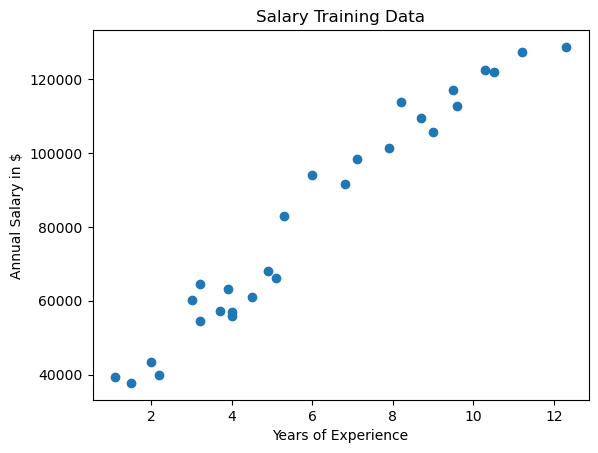

In [18]:
plt.scatter(X_train, y_train)
plt.xlabel('Years of Experience')
plt.ylabel('Annual Salary in $')
plt.title('Salary Training Data')
plt.show()

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)
print(f'Train Accuracy {round(lm.score(X_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(X_test, y_test)* 100,2)}%')

Train Accuracy 96.07%
Test Accuracy 96.31%


In [24]:
# help(lm.score)

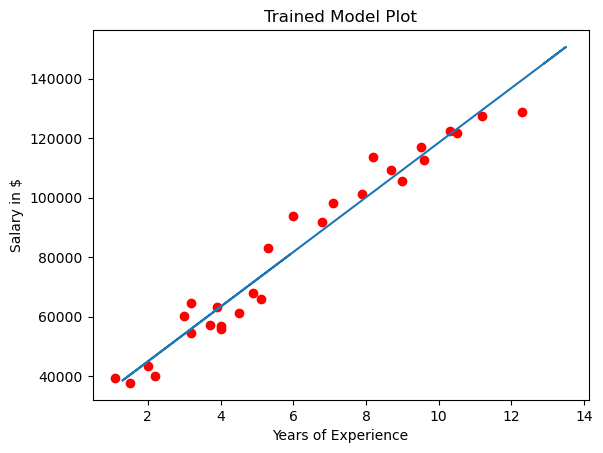

In [31]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test, y_predict)
plt.xlabel('Years of Experience')
plt.ylabel('Salary in $')
plt.title('Trained Model Plot')
plt.show()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

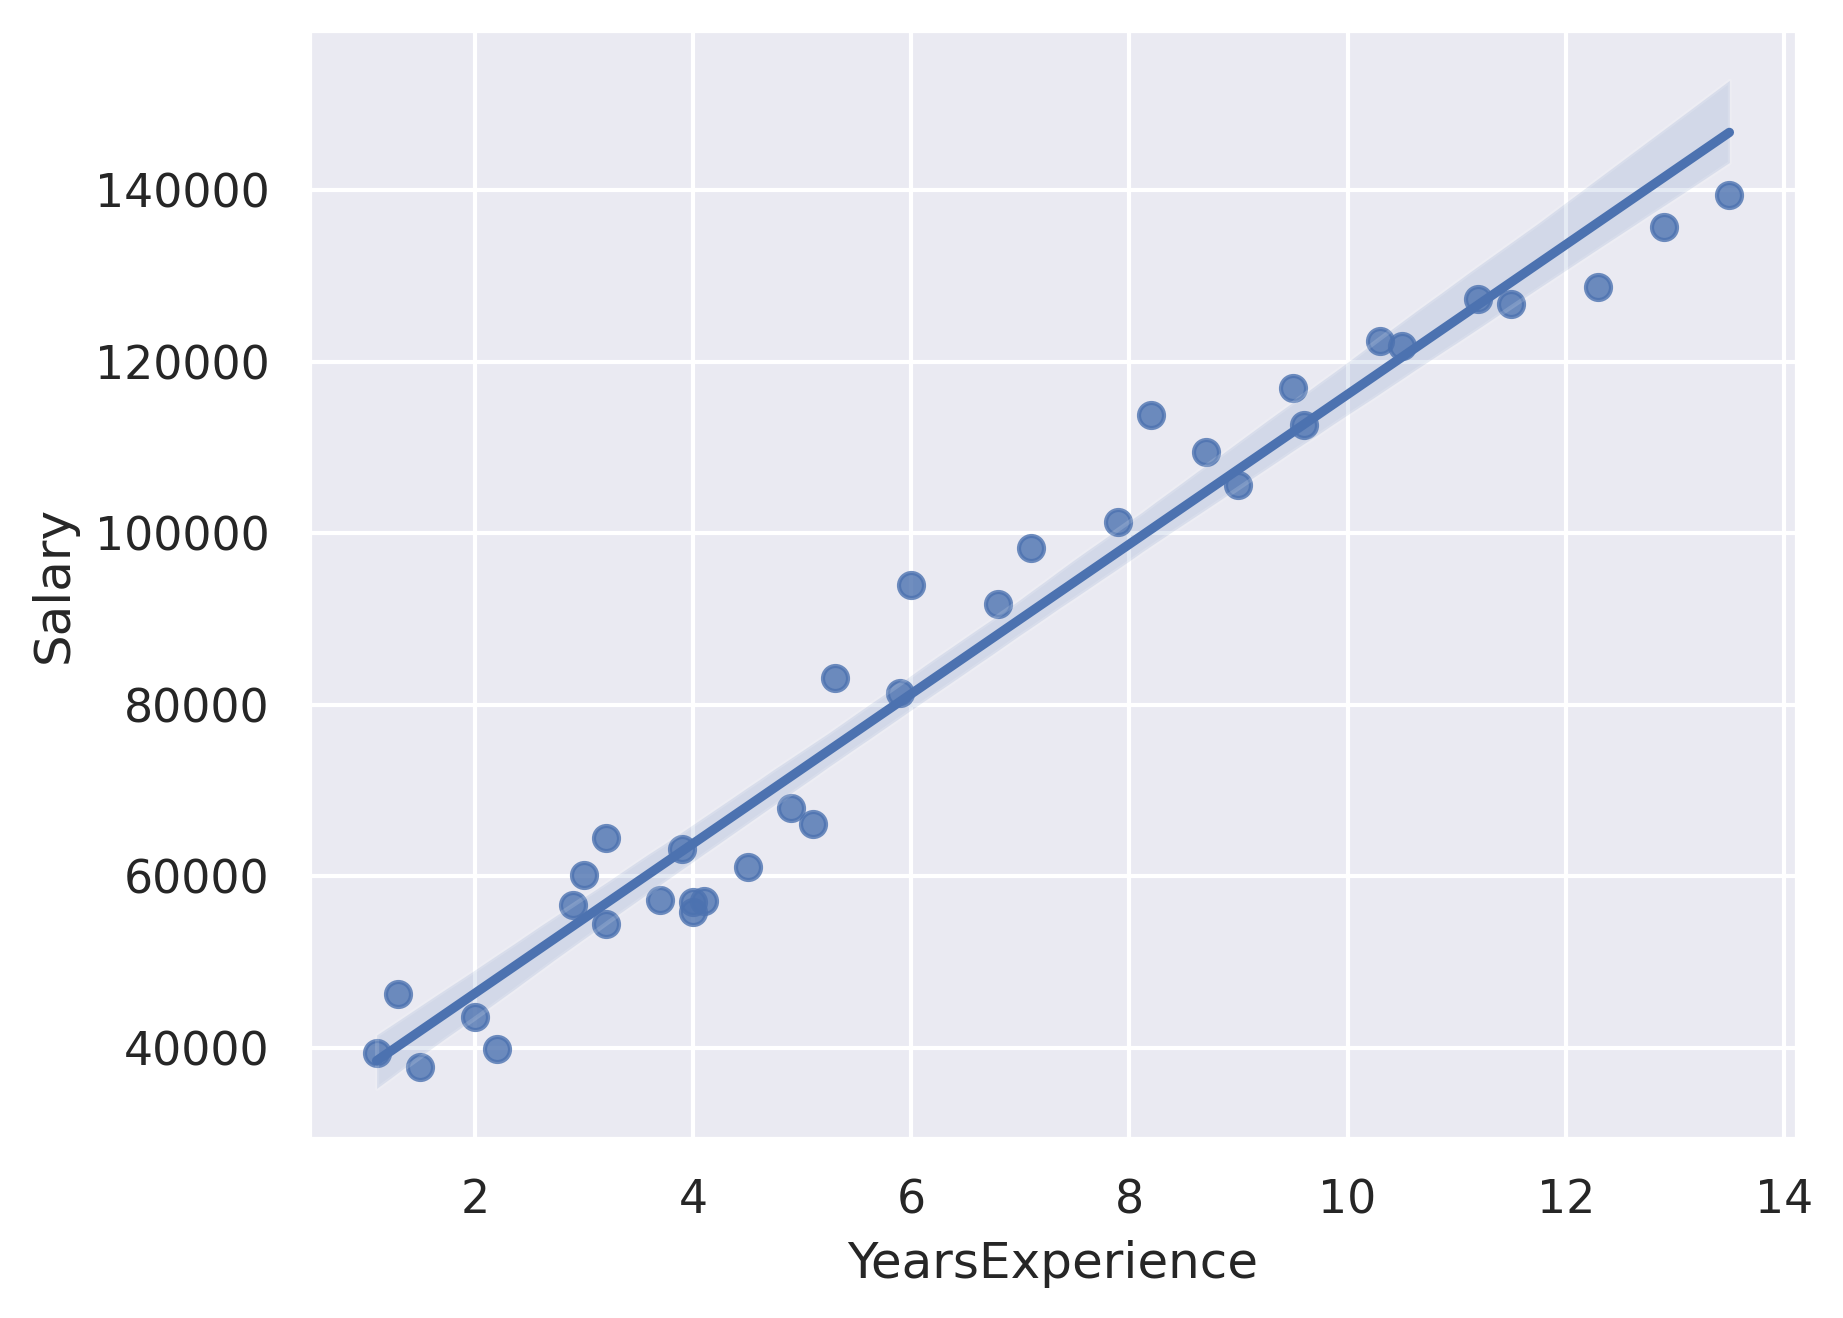

In [34]:
sns.set()
plt.figure(dpi=300)
sns.regplot(x='YearsExperience', y='Salary', data=salary)